In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv('../data/raw/data.csv')

# 1. Summary Statistics

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

# 2. Distribution of Numerical Features

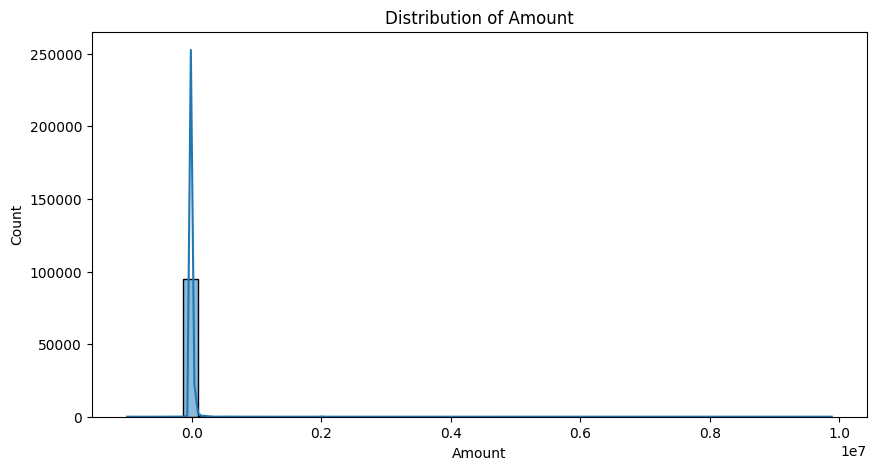

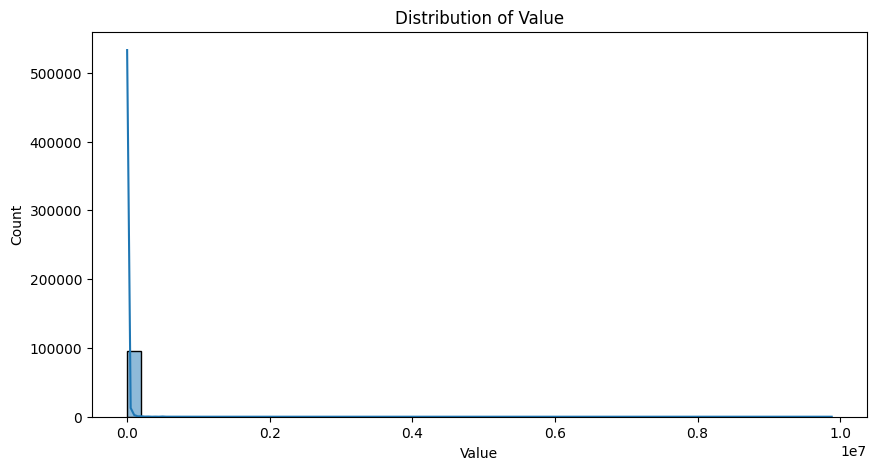

In [4]:
num_cols = ['Amount', 'Value']
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

# 3. Categorical Distribution

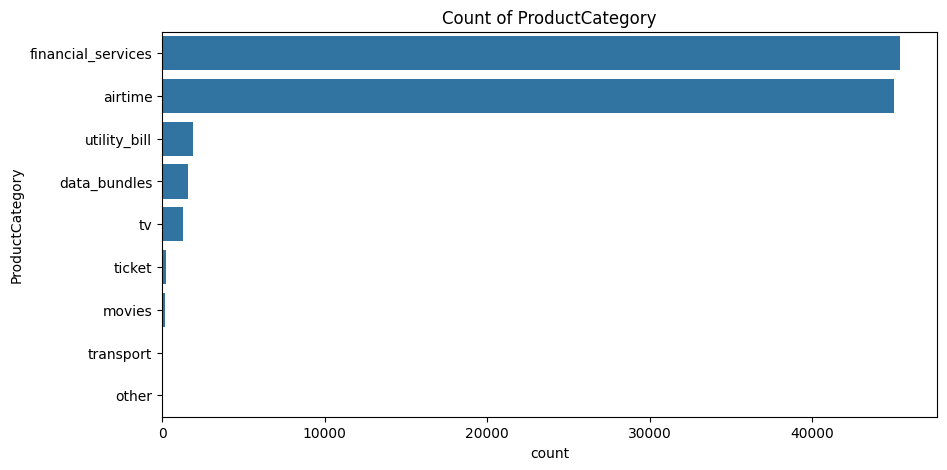

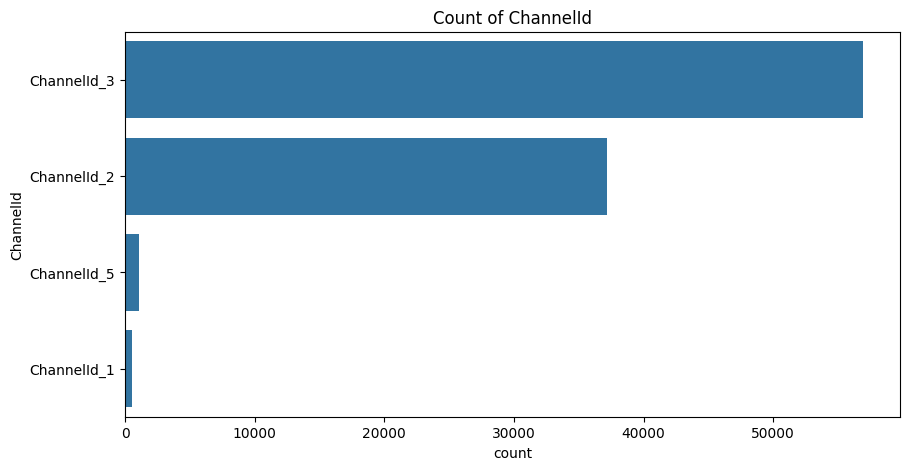

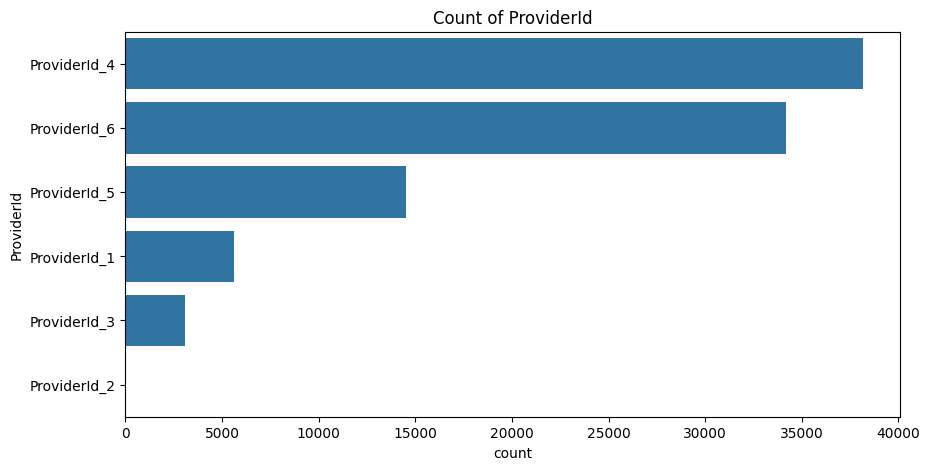

In [5]:
cat_cols = ['ProductCategory', 'ChannelId', 'ProviderId']
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

# 4. Correlation

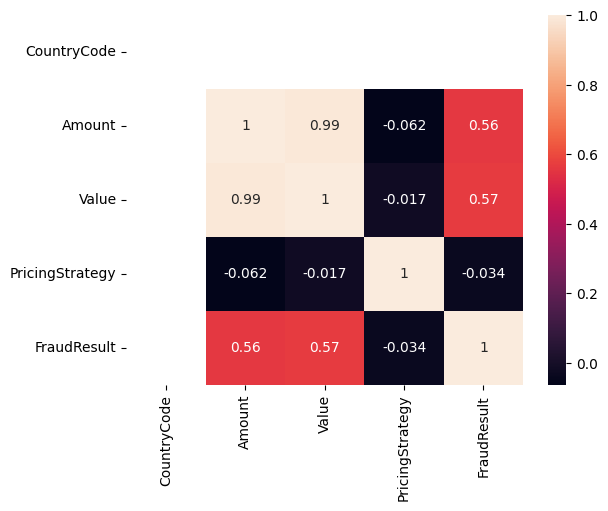

In [6]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True)
plt.show()

# 5. Outliers

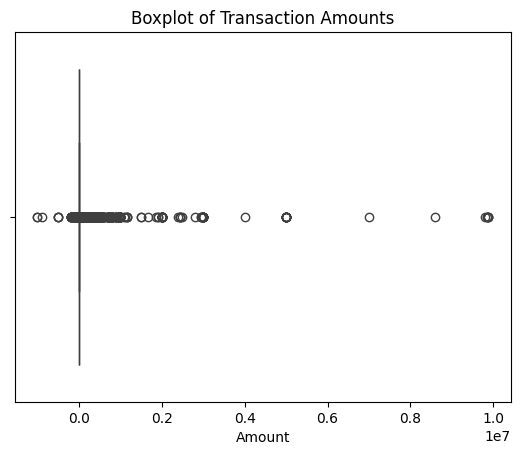

In [7]:
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Transaction Amounts")
plt.show()